In [ ]:
from google.colab import files


uploaded = files.upload()

Saving smoking_driking_dataset_Ver01.csv to smoking_driking_dataset_Ver01.csv


In [ ]:
import pandas as pd

import io

data = pd.read_csv(io.BytesIO(uploaded['smoking_driking_dataset_Ver01.csv']))
print(data.head())

    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...        126            92        17.1              1   
1           1  130  ...        148           121        15.8              1   
2           1  120  ...         74           104        15.8              1   
3           1  145  ...        104           106        17.6              1   
4           1  138  ...        117           104        13.8              1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data[['sex', 'DRK_YN']] = ordinal_encoder.fit_transform(data[['sex', 'DRK_YN']])

In [ ]:
X = data.drop(['SMK_stat_type_cd', 'DRK_YN'], axis=1)
y_smoking = data['SMK_stat_type_cd']
y_drinking = data['DRK_YN']

In [ ]:
X_train, X_test, y_smoking_train, y_smoking_test, y_drinking_train, y_drinking_test = train_test_split(
    X, y_smoking, y_drinking, test_size=0.2, random_state=42)

In [ ]:
smoking_classifier = RandomForestClassifier(random_state=42)
smoking_classifier.fit(X_train, y_smoking_train)
smoking_predictions = smoking_classifier.predict(X_test)

In [ ]:
smoking_accuracy = accuracy_score(y_smoking_test, smoking_predictions)
print("Accuracy for Smoking Status Prediction:", smoking_accuracy)

Accuracy for Smoking Status Prediction: 0.694204872144046


In [ ]:
drinking_classifier = RandomForestClassifier(random_state=42)
drinking_classifier.fit(X_train, y_drinking_train)
drinking_predictions = drinking_classifier.predict(X_test)

In [ ]:
drinking_accuracy = accuracy_score(y_drinking_test, drinking_predictions)
print("\nAccuracy for Drinking Status Prediction:", drinking_accuracy)


Accuracy for Drinking Status Prediction: 0.7291420789832047


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
smoking_dt_classifier = DecisionTreeClassifier(random_state=42)
smoking_dt_classifier.fit(X_train, y_smoking_train)
smoking_dt_predictions = smoking_dt_classifier.predict(X_test)

In [ ]:
smoking_dt_accuracy = accuracy_score(y_smoking_test, smoking_dt_predictions)
print("Accuracy for Smoking Status Prediction (Decision Tree):", smoking_dt_accuracy)

Accuracy for Smoking Status Prediction (Decision Tree): 0.6189438644272961


In [ ]:
smoking_lr_classifier = LogisticRegression(random_state=42)
smoking_lr_classifier.fit(X_train_scaled, y_smoking_train)
smoking_lr_predictions = smoking_lr_classifier.predict(X_test_scaled)

In [ ]:
smoking_lr_accuracy = accuracy_score(y_smoking_test, smoking_lr_predictions)
print("\nAccuracy for Smoking Status Prediction (Logistic Regression):", smoking_lr_accuracy)


Accuracy for Smoking Status Prediction (Logistic Regression): 0.6782518787511979


In [ ]:
drinking_dt_classifier = DecisionTreeClassifier(random_state=42)
drinking_dt_classifier.fit(X_train, y_drinking_train)
drinking_dt_predictions = drinking_dt_classifier.predict(X_test)

In [ ]:
drinking_dt_accuracy = accuracy_score(y_drinking_test, drinking_dt_predictions)
print("\nAccuracy for Drinking Status Prediction (Decision Tree):", drinking_dt_accuracy)


Accuracy for Drinking Status Prediction (Decision Tree): 0.6388762798204468


In [ ]:
drinking_lr_classifier = LogisticRegression(random_state=42)
drinking_lr_classifier.fit(X_train_scaled, y_drinking_train)
drinking_lr_predictions = drinking_lr_classifier.predict(X_test_scaled)

In [ ]:
drinking_lr_accuracy = accuracy_score(y_drinking_test, drinking_lr_predictions)
print("\nAccuracy for Drinking Status Prediction (Logistic Regression):", drinking_lr_accuracy)


Accuracy for Drinking Status Prediction (Logistic Regression): 0.7215362888989761


<Figure size 1400x1000 with 0 Axes>

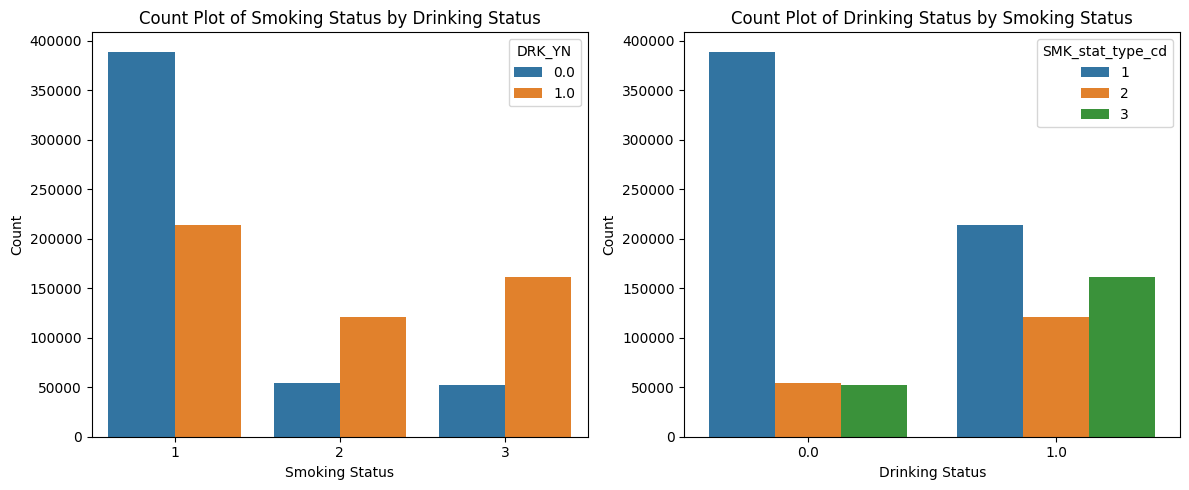

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Behavior'] = data['SMK_stat_type_cd'].astype(str) + '-' + data['DRK_YN'].astype(str)

plt.figure(figsize=(14, 10))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='SMK_stat_type_cd', data=data, hue='DRK_YN')
plt.title('Count Plot of Smoking Status by Drinking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='DRK_YN', data=data, hue='SMK_stat_type_cd')
plt.title('Count Plot of Drinking Status by Smoking Status')
plt.xlabel('Drinking Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
